In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [62]:
pokemon_dataset <- read_csv("https://raw.githubusercontent.com/JerryMa0716/dsci-100-2023s1-group-17/main/data/pokemon.csv")

pokemon_dataset
glimpse(pokemon_dataset)

# abilities column contains multiple values in a cell.
# Removed brackets, removed quotation marks, then split by comma.
tidy_pokemon_dataset <- pokemon_dataset |>
                        mutate(abilities = substr(abilities, 2, nchar(abilities) - 1)) |>
                        mutate(abilities = gsub("'", "", abilities)) |>
                        separate(abilities, 
                                 c("ability1", "ability2", "ability3", "ability4", "ability5", "ability6"),
                                 sep = ",") |>
                        mutate(is_legendary = as.logical(is_legendary)) |>
                        mutate(capture_rate = ifelse(row_number() == 774, "30", capture_rate)) |>
                        mutate(capture_rate = as.numeric(capture_rate))

tidy_pokemon_dataset
glimpse(tidy_pokemon_dataset)

Rows: 801 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): abilities, capture_rate, classfication, japanese_name, name, type1...
dbl (34): against_bug, against_dark, against_dragon, against_electric, again...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,⋯,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,⋯,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,⋯,88.1,3,122,120,80,grass,poison,100.0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
['Beast Boost'],2.00,0.5,2,0.5,4.0,2.0,0.5,1.0,0.5,⋯,NA,799,97,53,43,dark,dragon,888.0,7,1
['Prism Armor'],2.00,2.0,1,1.0,1.0,0.5,1.0,1.0,2.0,⋯,NA,800,127,89,79,psychic,NA,230.0,7,1
['Soul-Heart'],0.25,0.5,0,1.0,0.5,1.0,2.0,0.5,1.0,⋯,NA,801,130,115,65,steel,fairy,80.5,7,1


Rows: 801
Columns: 41
$ abilities         <chr> "['Overgrow', 'Chlorophyll']", "['Overgrow', 'Chloro…
$ against_bug       <dbl> 1.00, 1.00, 1.00, 0.50, 0.50, 0.25, 1.00, 1.00, 1.00…
$ against_dark      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ against_dragon    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ against_electric  <dbl> 0.5, 0.5, 0.5, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.…
$ against_fairy     <dbl> 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.…
$ against_fight     <dbl> 0.50, 0.50, 0.50, 1.00, 1.00, 0.50, 1.00, 1.00, 1.00…
$ against_fire      <dbl> 2.0, 2.0, 2.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 2.0, 2.…
$ against_flying    <dbl> 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.…
$ against_ghost     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0…
$ against_grass     <dbl> 0.25, 0.25, 0.25, 0.50, 0.50, 0.25, 2.00, 2.00, 2.00…
$ against_ground    <dbl> 1.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.5, 0.…
$ against_ice     

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 788 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, ...].”


ability1,ability2,ability3,ability4,ability5,ability6,against_bug,against_dark,against_dragon,against_electric,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>
Overgrow,Chlorophyll,NA,NA,NA,NA,1,1,1,0.5,⋯,88.1,1,65,65,45,grass,poison,6.9,1,FALSE
Overgrow,Chlorophyll,NA,NA,NA,NA,1,1,1,0.5,⋯,88.1,2,80,80,60,grass,poison,13.0,1,FALSE
Overgrow,Chlorophyll,NA,NA,NA,NA,1,1,1,0.5,⋯,88.1,3,122,120,80,grass,poison,100.0,1,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Beast Boost,NA,NA,NA,NA,NA,2.00,0.5,2,0.5,⋯,NA,799,97,53,43,dark,dragon,888.0,7,TRUE
Prism Armor,NA,NA,NA,NA,NA,2.00,2.0,1,1.0,⋯,NA,800,127,89,79,psychic,NA,230.0,7,TRUE
Soul-Heart,NA,NA,NA,NA,NA,0.25,0.5,0,1.0,⋯,NA,801,130,115,65,steel,fairy,80.5,7,TRUE


Rows: 801
Columns: 46
$ ability1          <chr> "Overgrow", "Overgrow", "Overgrow", "Blaze", "Blaze"…
$ ability2          <chr> " Chlorophyll", " Chlorophyll", " Chlorophyll", " So…
$ ability3          <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ ability4          <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ ability5          <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ ability6          <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ against_bug       <dbl> 1.00, 1.00, 1.00, 0.50, 0.50, 0.25, 1.00, 1.00, 1.00…
$ against_dark      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ against_dragon    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ against_electric  <dbl> 0.5, 0.5, 0.5, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.…
$ against_fairy     <dbl> 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.…
$ against_fight     <dbl> 0.50, 0.50, 0.50, 1.00, 1.00, 0.50, 1.00, 1.00, 1.00…
$ against_fire    

Warning message:
“Removed 15 rows containing missing values (geom_point).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



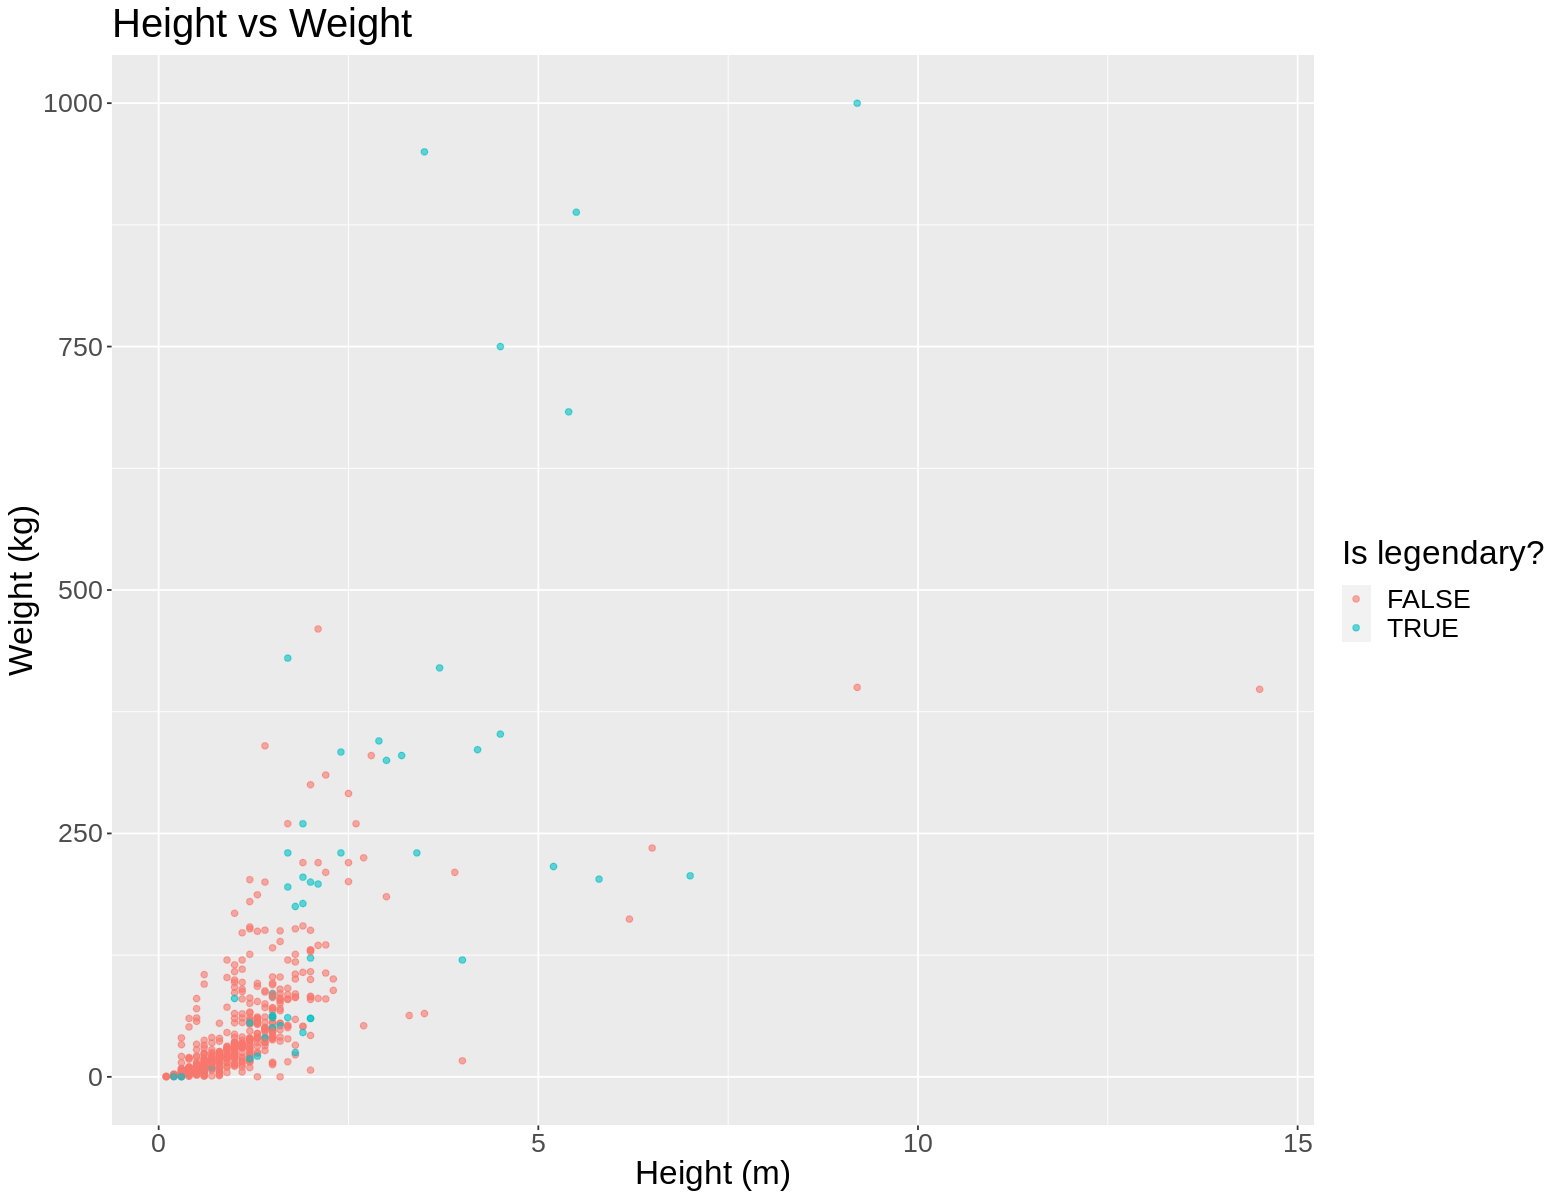

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



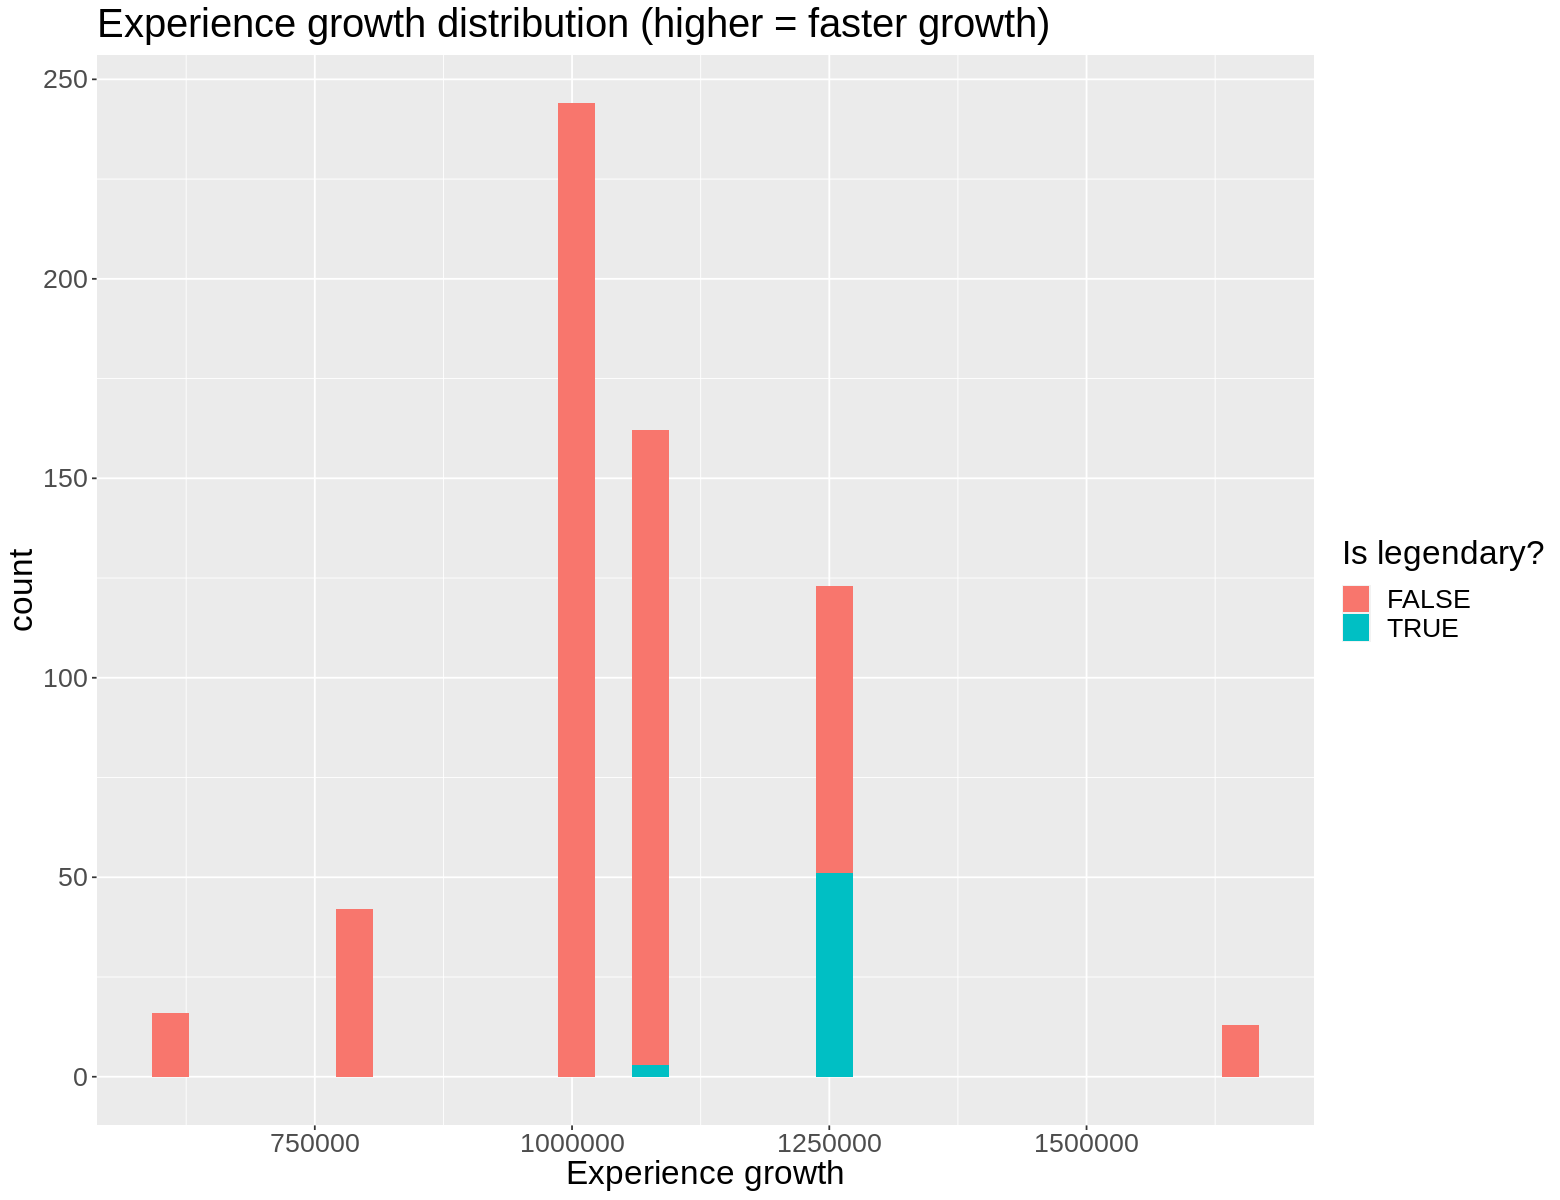

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



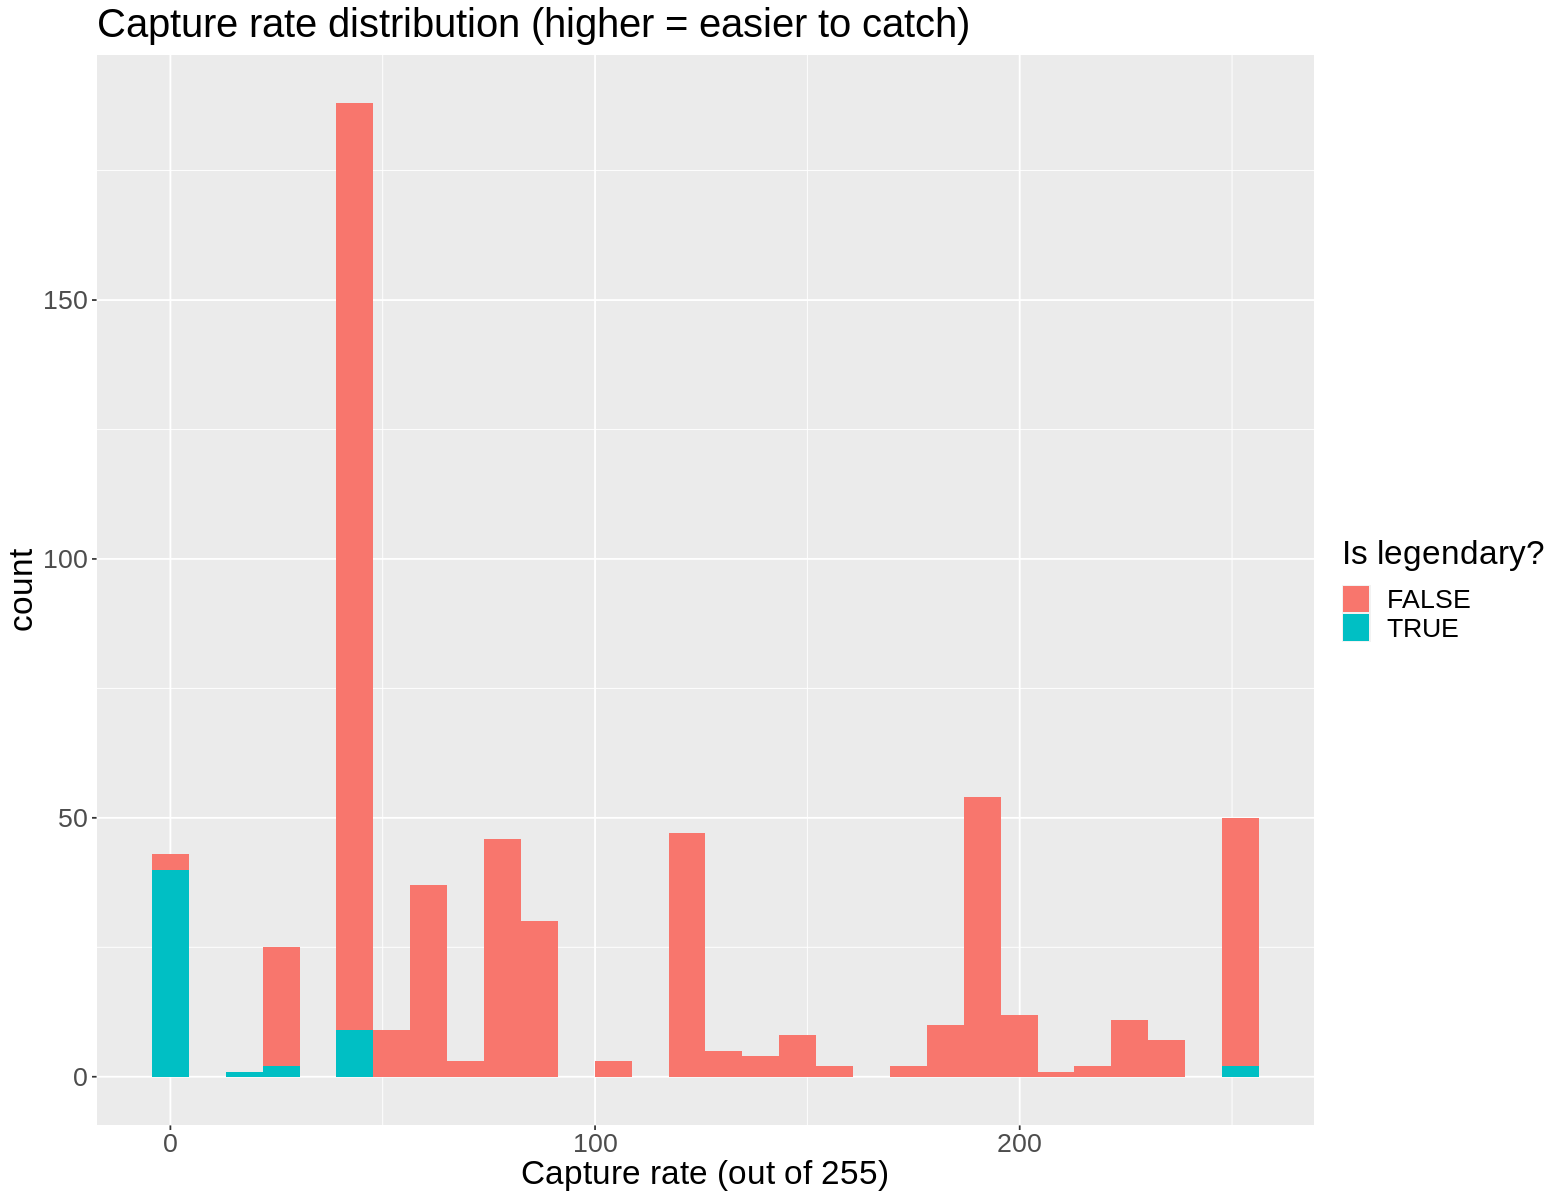

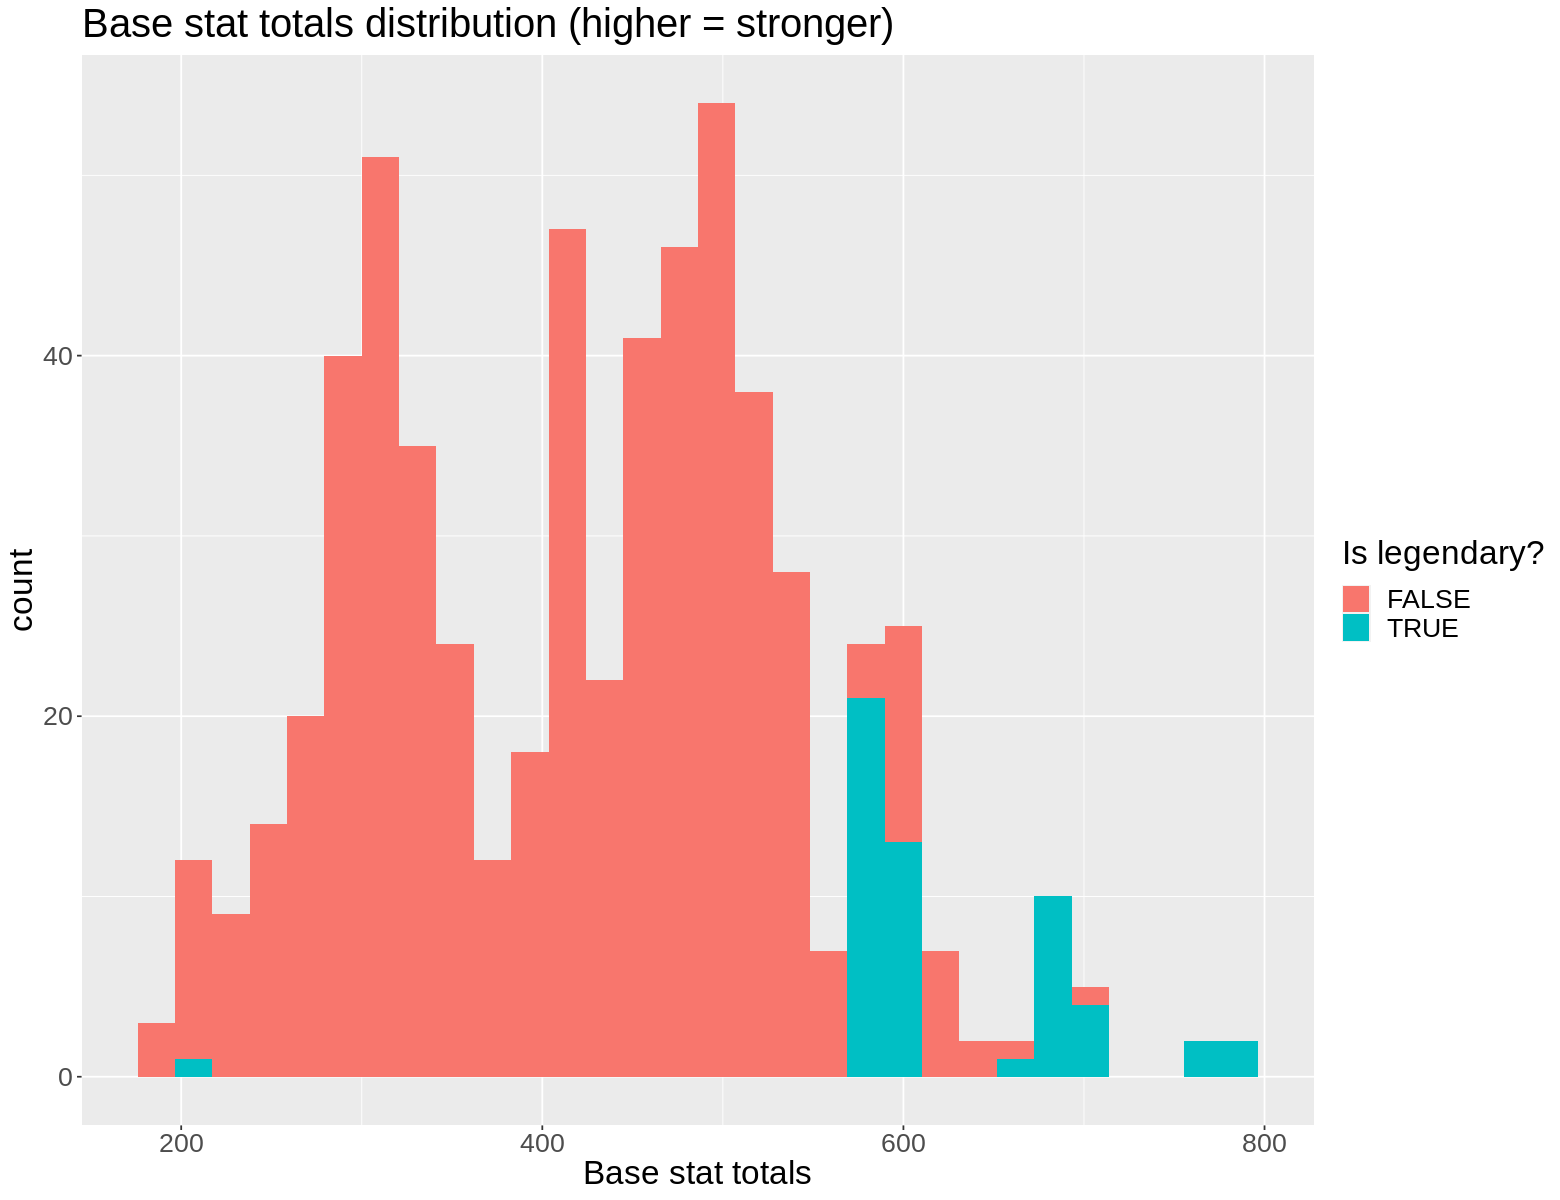

In [79]:
pokemon_split <- initial_split(tidy_pokemon_dataset, prop = 0.75, strata = is_legendary)
pokemon_train <- training(pokemon_split)
pokemon_test <- testing(pokemon_split)


options(repr.plot.width = 13, repr.plot.height = 10) 

pokemon_plot_height_weight <- ggplot(pokemon_train, aes(x = height_m, y = weight_kg, color = is_legendary)) +
                geom_point(alpha = 0.6) +
                theme(text = element_text(size = 20)) +
                labs(x = "Height (m)", y = "Weight (kg)", color = "Is legendary?") +
                ggtitle("Height vs Weight")

pokemon_plot_experience_growth <- ggplot(pokemon_train, aes(x = experience_growth, fill = is_legendary)) +
                geom_histogram() +
                theme(text = element_text(size = 20)) +
                labs(x = "Experience growth", fill = "Is legendary?") +
                ggtitle("Experience growth distribution (higher = faster growth)")

pokemon_plot_capture_rate <- ggplot(pokemon_train, aes(x = capture_rate, fill = is_legendary)) +
                geom_histogram() +
                theme(text = element_text(size = 20)) +
                labs(x = "Capture rate (out of 255)", fill = "Is legendary?") +
                ggtitle("Capture rate distribution (higher = easier to catch)")

pokemon_plot_base_stats <- ggplot(pokemon_train, aes(x = base_total, fill = is_legendary)) +
                geom_histogram() +
                theme(text = element_text(size = 20)) +
                labs(x = "Base stat totals", fill = "Is legendary?") +
                ggtitle("Base stat totals distribution (higher = stronger)")


pokemon_plot_height_weight
pokemon_plot_experience_growth
pokemon_plot_capture_rate
pokemon_plot_base_stats